<a href="https://www.kaggle.com/code/adedapoadeniran/recursive-feature-elimination-mood?scriptVersionId=194617715" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# This is recursive feature elimination on the factors that could be responsible for my daily mood flunctuations. 
## It was adapted from principal component analysis of my mood
### This is a more direct way of feature selection, and the result can be compared to that of PCA

Feature Ranking:
1. positiveevents: Rank 1
2. negativeevents: Rank 2
3. temperature: Rank 3
4. screentime: Rank 4
5. bpm: Rank 5
6. sleepquality: Rank 6
7. stress: Rank 7
8. kcal: Rank 8
9. standing: Rank 9
10. sleepduration: Rank 10
11. steps: Rank 11
12. aqi: Rank 12
13. moving: Rank 13

Top 12 features:
['positiveevents', 'negativeevents', 'temperature', 'screentime', 'bpm', 'sleepquality', 'stress', 'kcal', 'standing', 'sleepduration', 'steps', 'aqi']


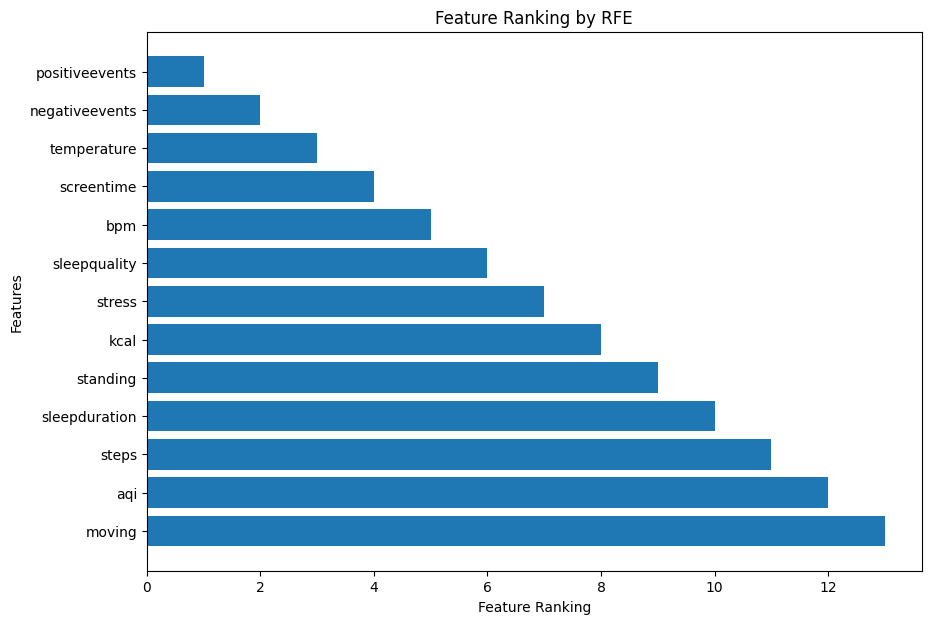

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/pcamood/PCAMood.csv')

# Separate the features and target variable
X = df.drop(columns=['mood'])
y = df['mood']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Recursive Feature Elimination (RFE) with a linear regression model
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)  # We'll rank all features
rfe.fit(X_scaled, y)

# Rank features based on their importance
ranking = rfe.ranking_
features_ranked = sorted(zip(X.columns, ranking), key=lambda x: x[1])

# Display feature ranking
print("Feature Ranking:")
for i, (feature, rank) in enumerate(features_ranked):
    print(f"{i+1}. {feature}: Rank {rank}")

# Select the top 12 features
top_12_features = [feature for feature, rank in features_ranked[:12]]
print("\nTop 12 features:")
print(top_12_features)

# Visualizing the feature ranking
plt.figure(figsize=(10, 7))
plt.barh(range(len(features_ranked)), [rank for _, rank in features_ranked], align='center')
plt.yticks(range(len(features_ranked)), [feature for feature, _ in features_ranked])
plt.xlabel('Feature Ranking')
plt.ylabel('Features')
plt.title('Feature Ranking by RFE')
plt.gca().invert_yaxis()
plt.show()


We would all agree that the ranking of features here makes more sense than the ranking we got from using PCA here https://www.kaggle.com/code/adedapoadeniran/pca-mood

### It makes absolute sense that external factors like positive events and negative events have the most impact on my mood. Followed by temperature of the atmosphere and my screentime, this again makes sense because apparently on days of higher extreme temperatures; i feel worse and on cooler days i feel better, also my screen time too is actually a good predictor of my mood this can be explained with the fact that whenever im on my phone its always me learning something new, or doing my daily routines that are positively affecting my mood. In the previous analysis, PCA showed that screentime has the least effect on my mood, RFE here proves otherwise. 

### Its surprising how stress can be ranked 7, one would expect stress to be a strong player in influencing my mood, apparently i am not often stressed out, so perheps much cannot be read into how stress affects my mood because im often not stressed out, this is, again due to my daily routines that keep me constantly in low stress mode, like mindfulness meditation. 